In [1]:
import os
import pandas as pd

s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print("from URL:", s)

df = pd.read_csv(s, header=None, encoding="utf-8")
df.tail()

from URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


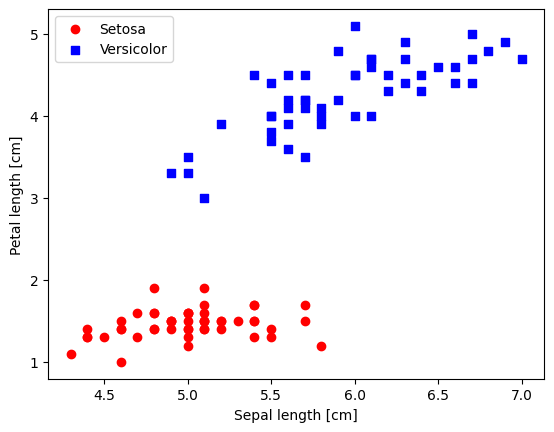

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="s", label="Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

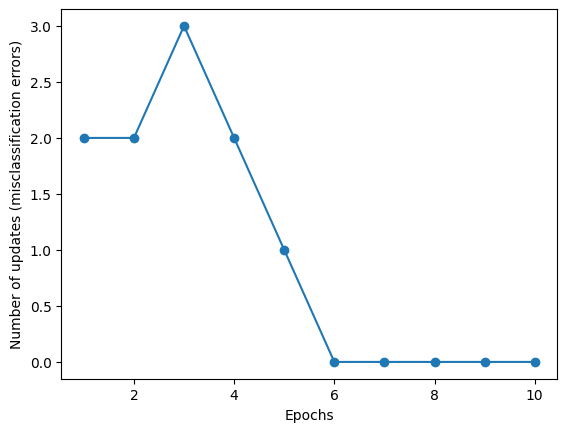

In [3]:
from c2_perceptron import Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates (misclassification errors)")
plt.show()

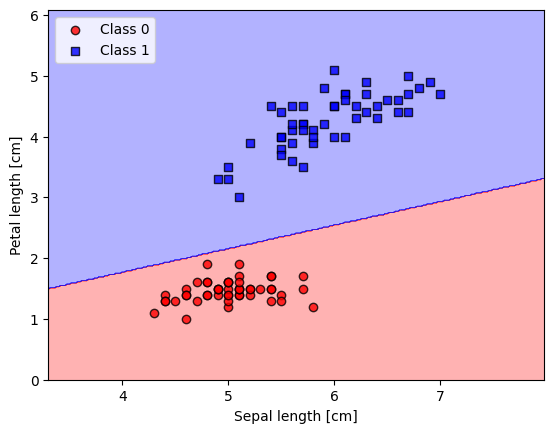

In [4]:
from convenience_function import plot_decision_regions

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

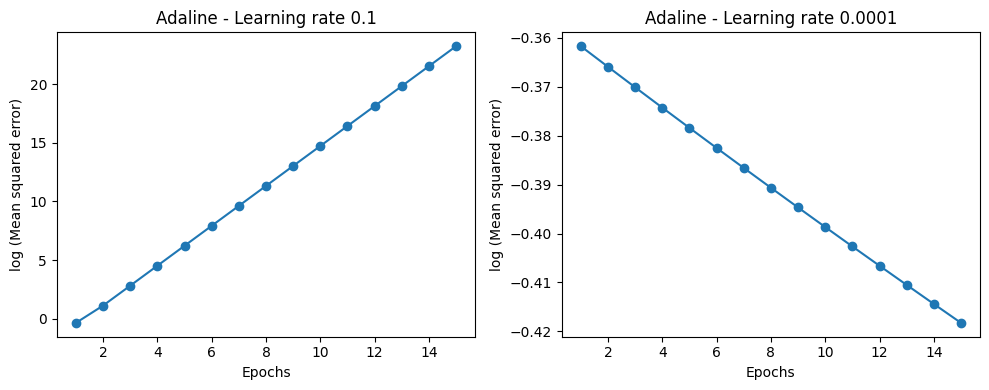

In [5]:
from c2_adaline import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(
    range(1, len(ada1.losses_) + 1),
    np.log10(ada1.losses_),
    marker="o",
)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log (Mean squared error)")
ax[0].set_title("Adaline - Learning rate 0.1")

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(
    range(1, len(ada2.losses_) + 1),
    np.log10(ada2.losses_),
    marker="o",
)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log (Mean squared error)")
ax[1].set_title("Adaline - Learning rate 0.0001")
fig.tight_layout()
plt.show()

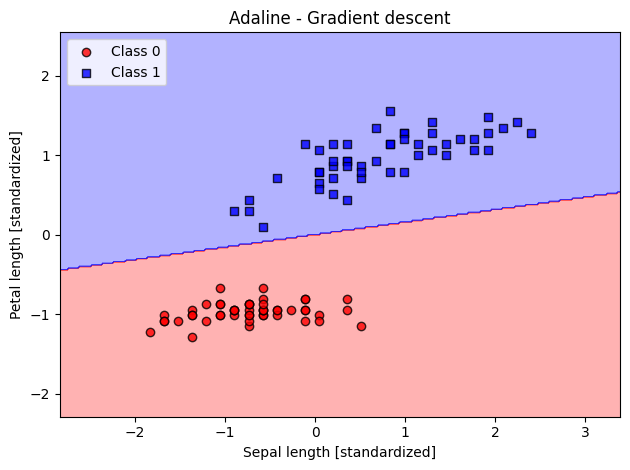

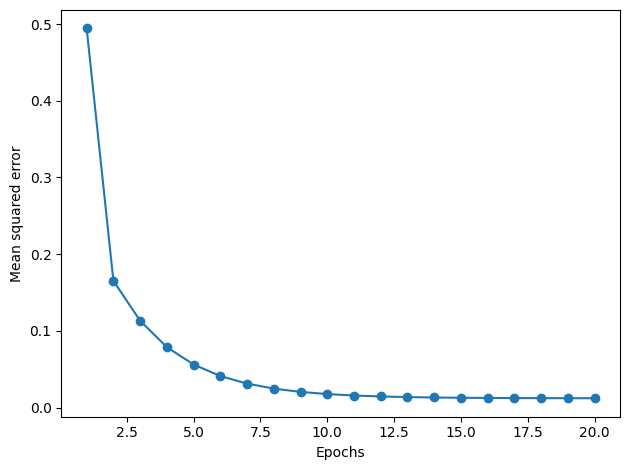

In [6]:
# Applying with standardization
from convenience_function import standardize

X_std = standardize(X)
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.tight_layout()
plt.show()

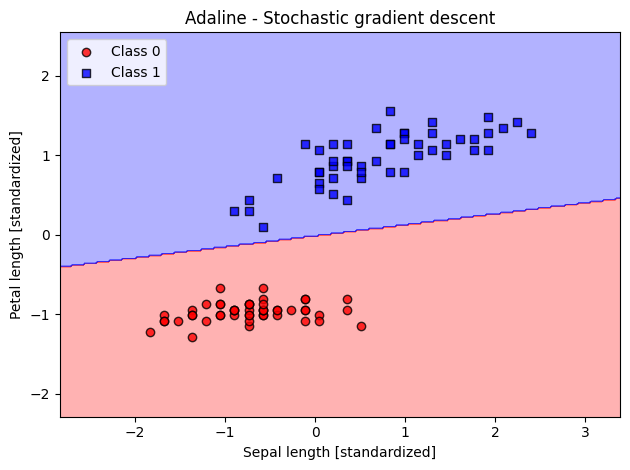

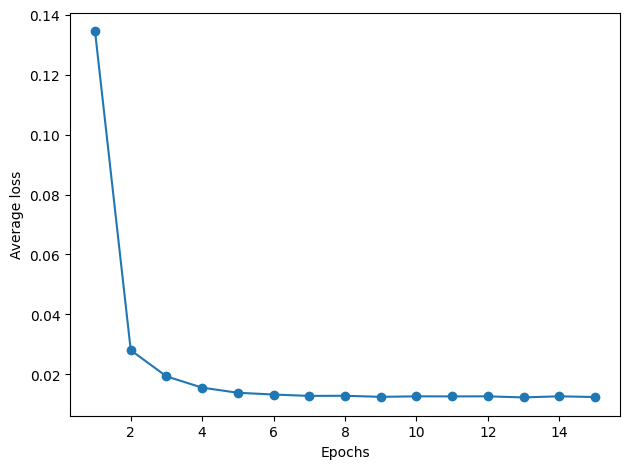

In [7]:
from c2_adaline import AdalineSGD

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic gradient descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average loss")
plt.tight_layout()
plt.show()